### Income Classification using Logistic Regression

##### Overview

In this project, we will be using a dataset containing census information from the 1994 Census database to create a logistic regression model that predicts whether or not a person makes more than $50,000.

Let’s get started!

#### Datasets

The original data set is available at the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/dataset/20/census+income)

The dataset has been loaded for you in script.py and saved as a DataFrame named df. Some of the input and output features of interest are:

- age: continuous
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- sex: Female, Male
- capital-gain: continuous
- capital-loss: continuous
- hours-per-week: continuous
- native country: discrete
- income: discrete, >50K, <=50K

##### EDA and Logistic Regression Assumptions

1. Load the dataset and save it as a dataframe named df. The result variable here is income. Check if the dataset is unbalanced.

In [1]:
import pandas as pd
import numpy as np

# Import dataset Census Income
from ucimlrepo import fetch_ucirepo 

census_income = fetch_ucirepo(id=20) 

# data (as pandas dataframes) 
df = pd.concat([census_income.data.features , census_income.data.targets ], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Check if the dataset is imbalanced.
df.income.value_counts(normalize=True)

income
<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
Name: proportion, dtype: float64

In [3]:
# Task 1
df.income = df.income.str.replace(r'\.$', '', regex=True)
df.income.value_counts(normalize=True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

2. Notice we have created a variable named ``feature_cols``. This contains a list of the variables we will use as our predictor variables.
    
    Transform the dataset of predictor variables to dummy variables and save this in a new DataFrame called X (upper case “X”).

In [4]:
#2. Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']

In [5]:
# Task 2

X = pd.get_dummies(df[feature_cols], drop_first=True, dtype=int)
X.head()

,age,capital-gain,capital-loss,hours-per-week,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39,2174,0,40,40,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,50,0,0,13,13,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,38,0,0,40,40,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,53,0,0,40,40,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,40,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


3. Using X, create a heatmap of the correlation values.

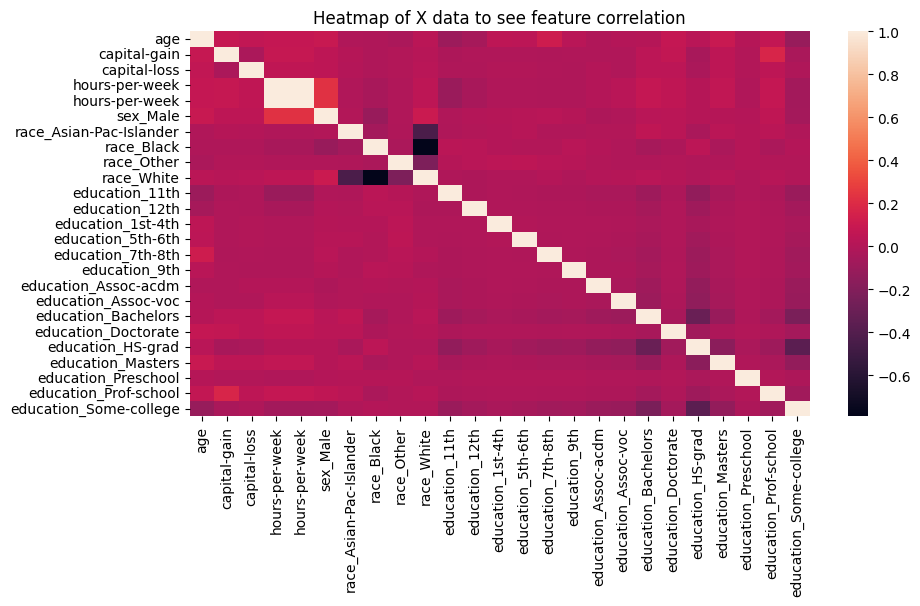

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Task 3
plt.figure(figsize=(10,5))
sns.heatmap(X.corr())
plt.title('Heatmap of X data to see feature correlation')
plt.show()

4. Determine if scaling is needed for X prior to modeling.

    Then create the y output variable which is binary, 0 when income is less than $50K, 1 when greater than $50K.

In [7]:
# Task 4

y = np.where(df.income == '<=50K', 0, 1)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

##### Logistic Regression Models and Evaluation

5. Split the data into a training and testing set. Set the ``random_state`` to ``1`` and ``test_size`` to ``.2``.

    Then using x_train, ``x_test, y_train, y_test``, fit a logistic regression model in scikit-learn on the training set with parameters ``C=0.05, penalty='l1', solver='liblinear'``.

    Lastly, use ``.predict()`` to create the y predictions and save this as ``y_pred``.

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1 )

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

6. Print the model parameters (intercept and coefficients).

In [13]:
print('Model Parameters, Intercep:')
print(log_reg.intercept_[0])

print()
print('Model Parameters, Coeff:')
print(log_reg.coef_)

Model Parameters, Intercep:
-5.771381964789605

Model Parameters, Coeff:
[[ 3.69752895e-02  3.36095646e-04  6.34785629e-04  2.16034062e-03
   2.91496903e-02  1.10197374e+00  0.00000000e+00 -3.72729569e-01
   0.00000000e+00  1.06081023e-01 -5.96843110e-01  0.00000000e+00
  -3.14465646e-01 -5.03186224e-01 -8.85338153e-01 -6.82472673e-01
   7.57522434e-01  6.93989574e-01  1.41059266e+00  1.97082092e+00
   8.05839898e-02  1.73901787e+00  0.00000000e+00  1.95549705e+00
   4.95430524e-01]]


7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.

In [20]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix on test set:
[[7055  375]
 [1356  983]]


8. Create a new DataFrame of the model coefficients and variable names. Sort values based on coefficient and exclude any that are equal to zero. Print the values of the DataFrame.

In [21]:
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
coef_df

,var,coef
14,education_7th-8th,-0.885338
15,education_9th,-0.682473
10,education_11th,-0.596843
13,education_5th-6th,-0.503186
7,race_Black,-0.372730
12,education_1st-4th,-0.314466
1,capital-gain,0.000336
2,capital-loss,0.000635
3,hours-per-week,0.002160
4,hours-per-week,0.029150
